In [61]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model
from skimage.io import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import visualkeras
from albumentations import GaussianBlur, CLAHE, Compose

In [2]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

# Augmentation

In [3]:
transforms = Compose([
            CLAHE(clip_limit=[5, 5], p=0.5),
            GaussianBlur(3,3, p=0.5)
]) 

def preprocessing(x):
    x = transforms(image=x.astype("uint8"))['image']
    return x
    
train_datagen = ImageDataGenerator(
    #preprocessing_function=preprocessing
)
val_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

C:\Users\USER\AppData\Roaming\Python\Python36\site-packages\albumentations\augmentations\transforms.py:1897: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  "blur_limit and sigma_limit minimum value can not be both equal to 0. "


In [96]:
train_generator = train_datagen.flow_from_directory(
    './New_Rice_Dataset/train',
    target_size=(224,224),
    batch_size = 32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    './New_Rice_Dataset/validation',
    target_size=(224,224),
    batch_size = 32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    './New_Rice_Dataset/test',
    target_size=(224,224),
    batch_size = 32,
    class_mode='categorical'
)


Found 1200 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [5]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Flatten


resnet50 = MobileNet(input_shape=(224, 224, 3), include_top=False)
out = Flatten()(resnet50.output)
out = Dense(1024, activation='relu')(out)
out = Dense(3, activation='softmax')(out)
model = Model(resnet50.input, out)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [6]:
from  tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, History
from tensorflow.keras import optimizers

opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, min_delta=0)
checkpoint_callback = ModelCheckpoint('best.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [7]:
model.compile(optimizer = opt, loss='categorical_crossentropy', metrics=['acc'])

In [8]:
model.fit(train_generator, epochs=10000, verbose=1, validation_data=val_generator, callbacks=[early_stopping_callback, checkpoint_callback])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 38 steps, validate for 5 steps
Epoch 1/10000
37/38 [============================>.] - ETA: 3s - loss: 11.2495 - acc: 0.7920
Epoch 00001: val_loss improved from inf to 16.47294, saving model to best.h5
38/38 [==============================] - 123s 3s/step - loss: 10.9634 - acc: 0.7958 - val_loss: 16.4729 - val_acc: 0.6133
Epoch 2/10000
37/38 [============================>.] - ETA: 2s - loss: 0.3287 - acc: 0.9700
Epoch 00002: val_loss improved from 16.47294 to 12.49326, saving model to best.h5
38/38 [==============================] - 118s 3s/step - loss: 0.3335 - acc: 0.9692 - val_loss: 12.4933 - val_acc: 0.6000
Epoch 3/10000
37/38 [============================>.] - ETA: 3s - loss: 0.1092 - acc: 0.9897
Epoch 00003: val_loss did not improve from 12.49326
38/38 [==============================] - 126s 3s/step - loss: 0.1061 - acc: 0.9900 - val_loss: 47.7889 - val_acc: 0.3533
Epoch 4/10000
37/38 [============================>.] - ET

Epoch 29/10000
37/38 [============================>.] - ETA: 2s - loss: 4.9625e-07 - acc: 1.0000
Epoch 00029: val_loss did not improve from 0.01301
38/38 [==============================] - 116s 3s/step - loss: 4.8335e-07 - acc: 1.0000 - val_loss: 0.0148 - val_acc: 0.9933
Epoch 30/10000
37/38 [============================>.] - ETA: 2s - loss: 4.7108e-07 - acc: 1.0000
Epoch 00030: val_loss did not improve from 0.01301
38/38 [==============================] - 116s 3s/step - loss: 4.5952e-07 - acc: 1.0000 - val_loss: 0.0144 - val_acc: 0.9933
Epoch 31/10000
37/38 [============================>.] - ETA: 2s - loss: 4.5225e-07 - acc: 1.0000
Epoch 00031: val_loss did not improve from 0.01301
38/38 [==============================] - 116s 3s/step - loss: 4.4050e-07 - acc: 1.0000 - val_loss: 0.0152 - val_acc: 0.9933
Epoch 32/10000
37/38 [============================>.] - ETA: 2s - loss: 4.3322e-07 - acc: 1.0000
Epoch 00032: val_loss did not improve from 0.01301
38/38 [=============================

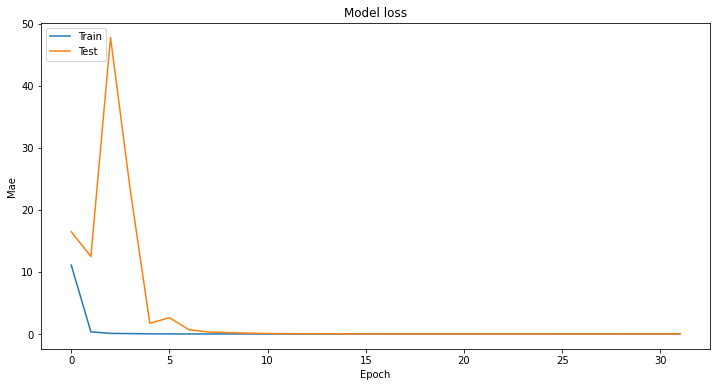

In [9]:
# Plotting the trajectory of loss function
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

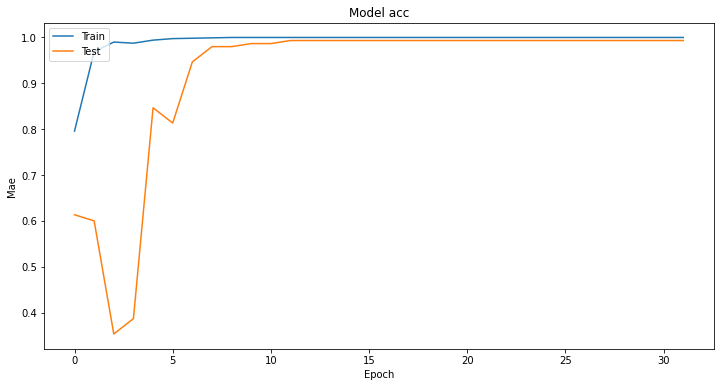

In [10]:
# Plotting the trajectory of loss function
plt.figure(figsize=(12,6))
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 評估

In [11]:
from tensorflow.keras.models import load_model
best_model = load_model('best.h5')

In [12]:
best_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [13]:
## 評估Model在test data的績效

print('val data:')
loss, accuracy = best_model.evaluate(val_generator)
print('test data:')
loss, accuracy = best_model.evaluate(test_generator)

val data:
  ...
    to  
  ['...']
5/5 [==============================] - 7s 1s/step - loss: 0.0130 - acc: 0.9933
test data:
  ...
    to  
  ['...']
5/5 [==============================] - 7s 1s/step - loss: 0.0095 - acc: 0.9933


In [94]:
test_generator.shuffle = False
val_generator.shuffle = False

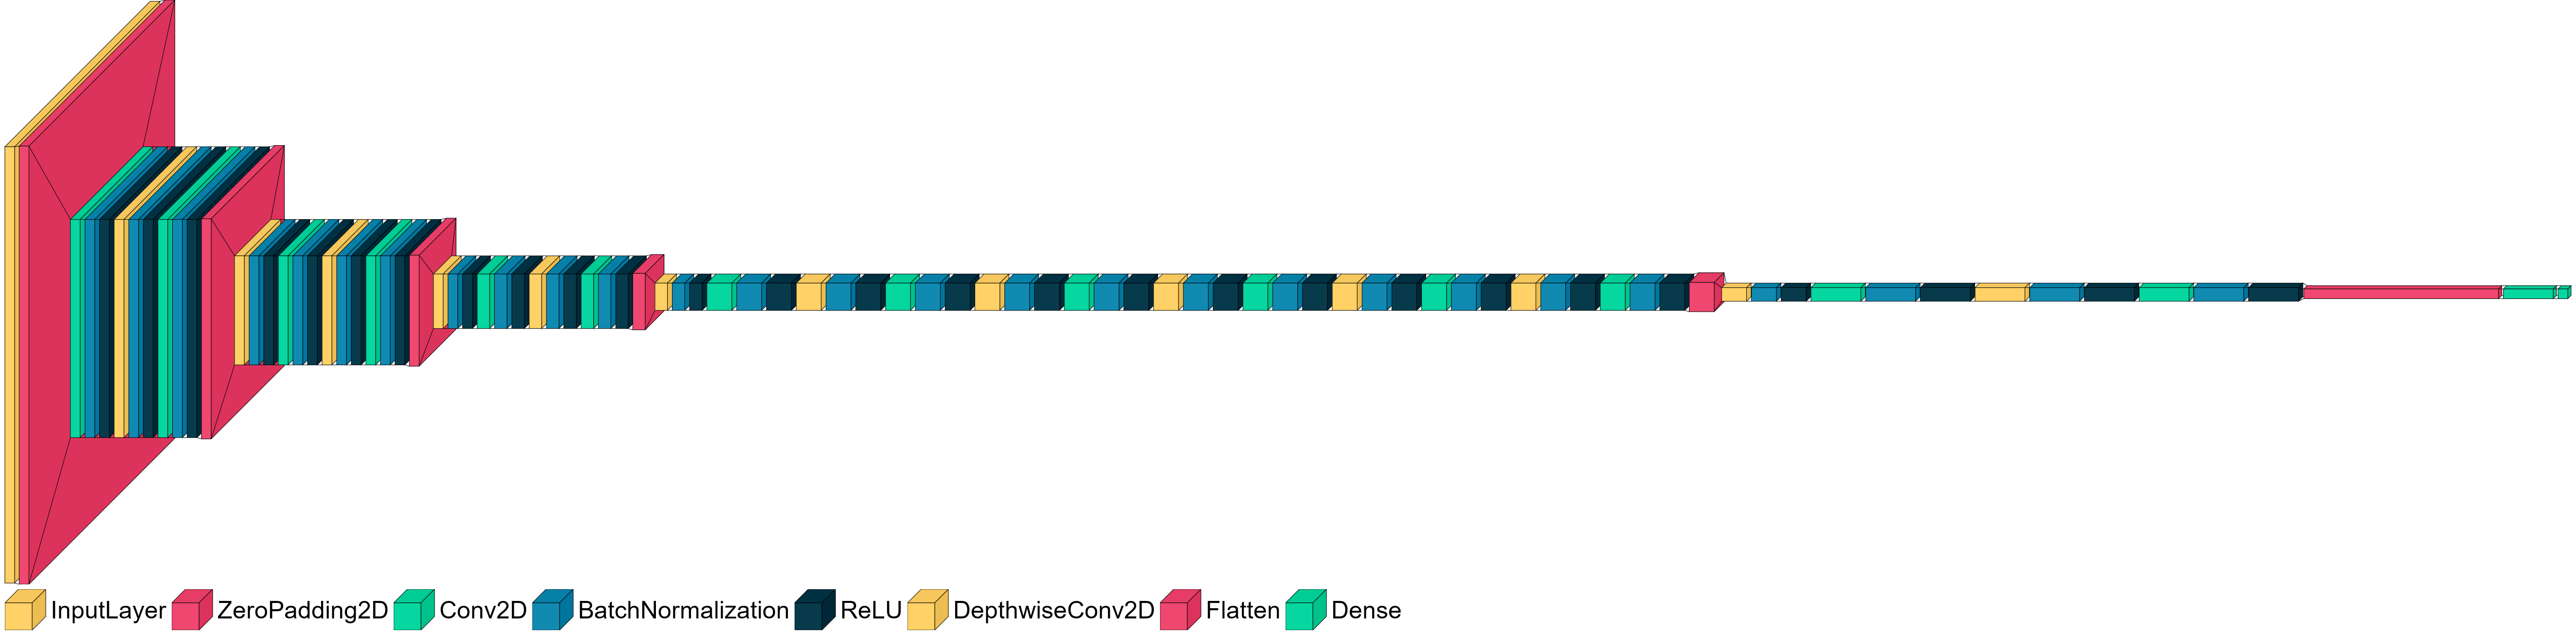

In [67]:
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 50)
visualkeras.layered_view(best_model, font=font, legend=True)

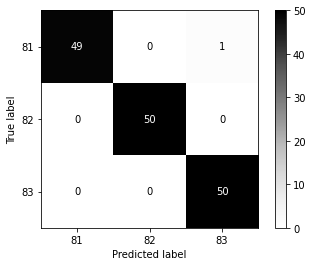

In [58]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

probabilities  = best_model.predict(val_generator)
y_pred = np.argmax(probabilities, axis=-1)
y_true = val_generator.classes

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
labels = ["81", "82", "83"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Greys)
plt.show()

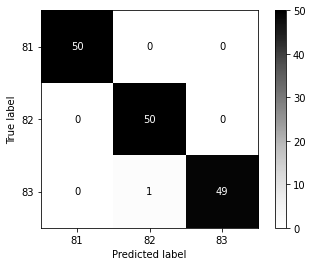

In [59]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
probabilities  = best_model.predict(test_generator)
y_pred = np.argmax(probabilities, axis=-1)
y_true = test_generator.classes

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
labels = ["81", "82", "83"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Greys)
plt.show()

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [68]:
print("Accuracy:    ",accuracy_score(y_true,y_pred))
print("Precision:   ",precision_score(y_true,y_pred, average='macro'))
print("Recall:      ",recall_score(y_true,y_pred, average='macro'))
print("F1:          ",f1_score(y_true,y_pred, average='macro'))

Accuracy:     0.9933333333333333
Precision:    0.9934640522875817
Recall:       0.9933333333333333
F1:           0.9933326665999934
